**Project Progress Report # 1**

*Team Members: John DeLeon, Darshan Joshi, Dae-Breona Armour*

CS 6330-DS1 Data Science | Spring B 2025

Dr. Dogdu | Angelo State University

Department of Computer Science

# Data Exploratory Data Analysis (EDA)

## Environment Setup for EDA

Before we start our Exploratory Data Analysis, there are some additional packages we will need to install.

* kagglehub - Import our Kaggle dataset
* textstat - To gain additional insight with our text fields

In [ ]:
%%capture
!pip install kagglehub > /dev/null 2>&1
!pip install textstat

### Purpose:

Additionally, we want to update some of the default pandas options and set basic logging configuration to get a better view of our dataset during our data exploration.

In [25]:
import os
import logging
from typing import List
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Set up logging for debug information:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Option 1: Set display options to show all rows:
pd.set_option('display.max_rows', None)

# Option 2: Set display options to show all columns:
pd.set_option('display.max_columns', None)

# Option 3: Set the width to show all content:
pd.set_option('display.width', None)

# Option 4: Set the max column width to avoid truncating cell contents:
pd.set_option('display.max_colwidth', None)


## Data Wrangling

### Step 1: Discovering

Discovery, also called data exploration, familiarizes the data scientist with source data in preparation for subsequent steps.



In [2]:
import kagglehub
import nltk
import os
import pandas as pd

# Download latest version of the dataset
path = kagglehub.dataset_download("rishantenis/real-and-fake-jobs-posting-prediction")
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path,csv_file))

### Purpose:
Get the first 5 rows of our dataset to make sure it loaded correctly and that there are no issues. Since the text columns has a lot of data we view those separately in an additional code cell.

In [20]:
df[
    ['job_id',
     'title',
     'location',
     'department',
     'salary_range',
     'telecommuting',
     'has_company_logo',
     'has_questions',
     'employment_type',
     'required_experience',
     'required_education',
     'industry',
     'function',
     'fraudulent'
     ]
    ].head()

,job_id,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [23]:
df[
    ['job_id',
     'company_profile',
     'description',
     'requirements',
     'benefits'
     ]
    ].head(1)

,job_id,company_profile,description,requirements,benefits
0,1,"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.","Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff","Experience with content management systems a major plus (any blogging counts!)Familiar with the Food52 editorial voice and aestheticLoves food, appreciates the importance of home cooking and cooking with the seasonsMeticulous editor, perfectionist, obsessive attention to detail, maddened by typos and broken links, delighted by finding and fixing themCheerful under pressureExcellent communication skillsA+ multi-tasker and juggler of responsibilities big and smallInterested in and engaged with social media like Twitter, Facebook, and PinterestLoves problem-solving and collaborating to drive Food52 forwardThinks big picture but pitches in on the nitty gritty of running a small company (dishes, shopping, administrative support)Comfortable with the realities of working for a startup: being on call on evenings and weekends, and working long hours",NaN


### Results:

Our dataset we loaded seems to match the structure we expect from Kaggle and now we will keep doing further discovery.

### Purpose:

Get a high-level summary of our data's structure.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

### Results:
From using the "info()" function we understand that we have the 18 columns that we expect, the 17,880 rows we expect, and we understand at a high-level our data types, and how many "non-null" values we have for each column. Next let's dig deeper into the Null fields we have.

### Purpose:
From order of greatest to least, we want to see what percentage of a given fields values are Null, we also want to start thinking about which fields we can probably use for our Data Science Model. If a field has too many Nulls or if real-world job posting don't have that data then we may suggest to drop those fields.

In [6]:
def inspect_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Inspect the dataset for missing values, datatypes, and number of unique values.

    Args:
        (Pandas DataFrame): DataFrame to inspect.

    Returns:
        Summary Pandas DataFrame with information per column.
    """
    try:
        summary = pd.DataFrame({
            'Data Type': df.dtypes,
            'Missing Values': df.isnull().sum(),
            'Missing %': round((df.isnull().mean() * 100), 2),
            'Unique Values': df.nunique(),
            # 'Sample Value': df.iloc[0]
        })
        summary = summary.sort_values(by='Missing %', ascending=False)
        logging.info("Data inspection completed.")
        return summary
    except Exception as e:
        logging.error(f"Error during data inspection: {e}")
        raise

# Run inspection
data_summary = inspect_data(df)

data_summary


,Data Type,Missing Values,Missing %,Unique Values
salary_range,object,15012,83.96,874
department,object,11547,64.58,1337
required_education,object,8105,45.33,13
benefits,object,7212,40.34,6203
required_experience,object,7050,39.43,7
function,object,6455,36.10,37
industry,object,4903,27.42,131
employment_type,object,3471,19.41,5
company_profile,object,3308,18.50,1709
requirements,object,2696,15.08,11965


### Results:

Suggested that we Drop the following Columns later on: salary_range, department, required_education, benefits, required_experience, function, industry, location, job_id, has_questions, has_company_logo.

We reccommend droping the above fields because some of them aren't useful in identifying fraudulent jobs even if the columns didn't have so many nulls. For other columns, when looking at real world job posting, we don't always see this information and ideally we want the fields used in our training data to match the real-world as closely as possible.

### Purpose:
Checking for Duplicate Rows of Data to see if we need to de-duplicate our dataset later on.

In [13]:

def check_duplicates(df, subset=None):
    """
    Check a DataFrame for duplicate rows and return statistics.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to check for duplicates
    subset : list, optional
        List of column names to consider for identifying duplicates.
        If None, use all columns.

    Returns:
    --------
    dict
        Dictionary containing:
        - 'has_duplicates': Boolean indicating if duplicates exist
        - 'duplicate_count': Number of duplicate rows
        - 'duplicate_rows': DataFrame containing only the duplicate rows
        - 'value_counts': Series showing counts for each duplicated row
    """
    # Get value counts for each unique row combination
    if subset is None:
        value_counts = df.value_counts()
    else:
        value_counts = df.value_counts(subset=subset)

    # Find rows with count > 1 (duplicates)
    duplicated_rows = value_counts[value_counts > 1]

    # Calculate total number of duplicate rows (excluding first occurrences)
    duplicate_count = sum(count - 1 for count in duplicated_rows)

    # Find the actual duplicate rows in the DataFrame
    if subset is None:
        mask = df.duplicated(keep=False)
    else:
        mask = df.duplicated(subset=subset, keep=False)

    duplicate_rows_df = df[mask].copy()

    # Return results as a dictionary
    result = {
        'has_duplicates': len(duplicated_rows) > 0,
        'duplicate_count': duplicate_count,
        'duplicate_rows': duplicate_rows_df,
        'value_counts': duplicated_rows
    }

    return result

# Check for dupes:
num_duplicates = check_duplicates(df)
print(f"Has duplicates: {num_duplicates['has_duplicates']}")
print(f"Number of duplicate rows: {num_duplicates['duplicate_count']}")
print("Duplicate rows:")
print(num_duplicates['duplicate_rows'])

Has duplicates: False
Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [job_id, title, location, department, salary_range, company_profile, description, requirements, benefits, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function, fraudulent]
Index: []


### Results:
Seems like we don't have any duplicate rows of data in our dataset so we won't need to do any "de-duplication" in our "Cleaning" step.

### Purpose:
The purpose of the below function is to visualize the distribution of values in categorical and binary columns from the dataset. For each specified column, it generates a horizontal bar chart that shows how frequently each category or value appears. This helps in understanding the balance, skewness, and patterns within categorical variables, which is critical for exploratory data analysis and for identifying potential data issues (such as class imbalance).

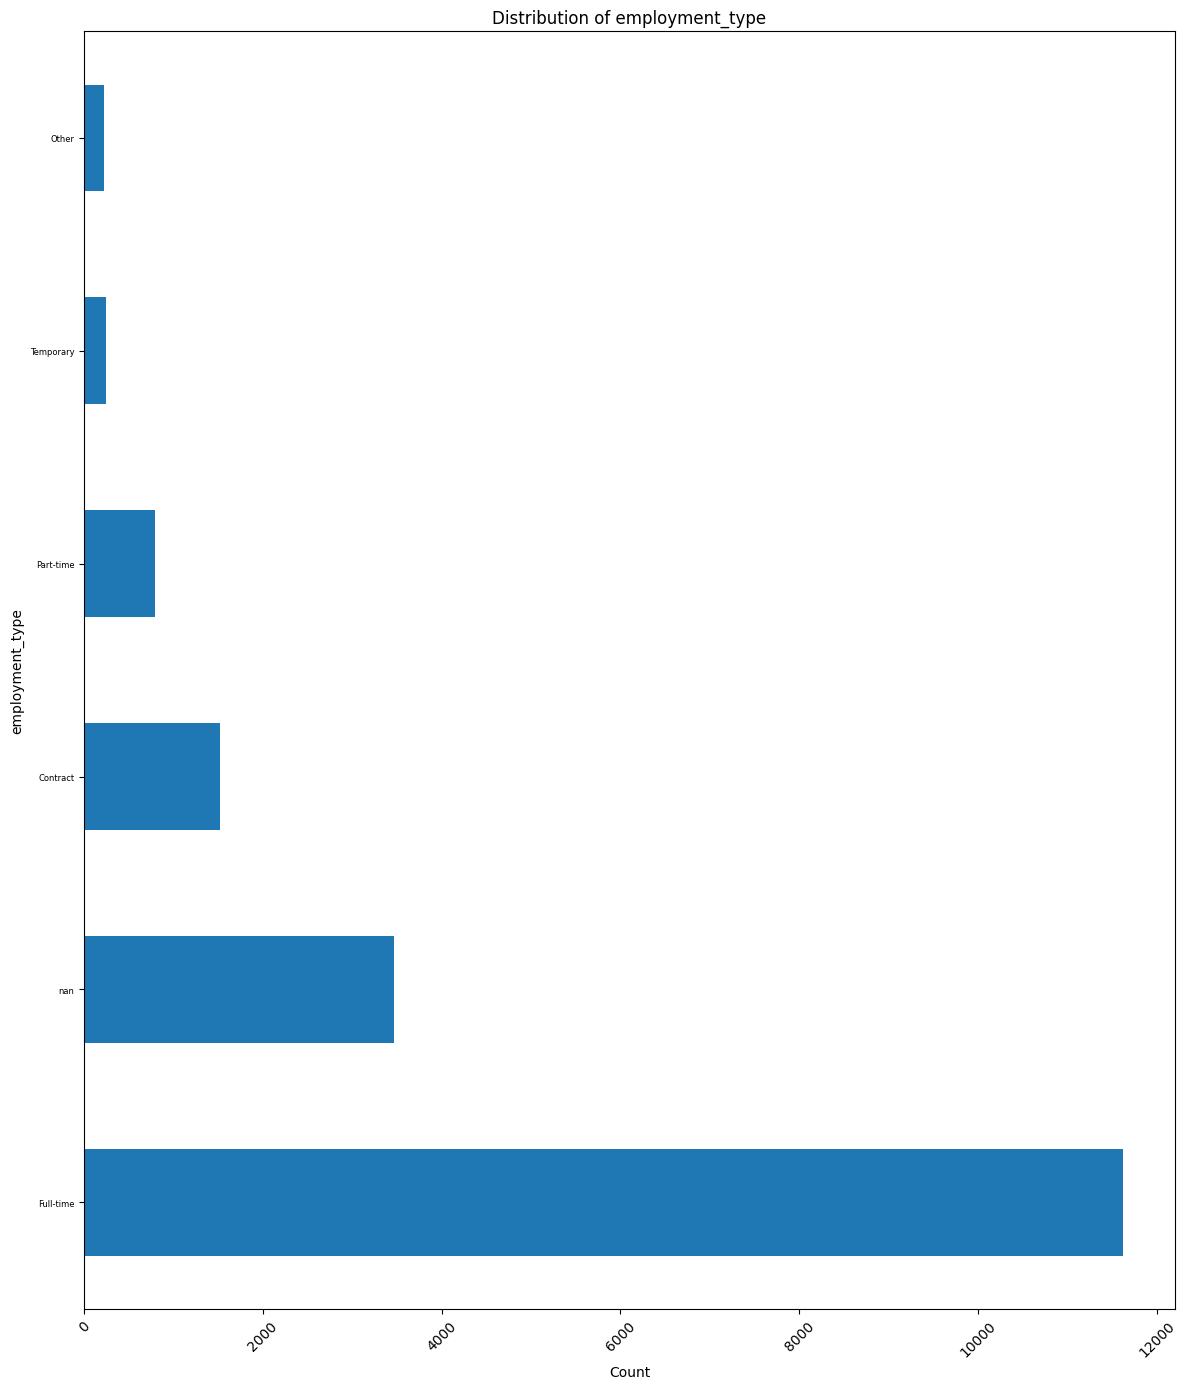

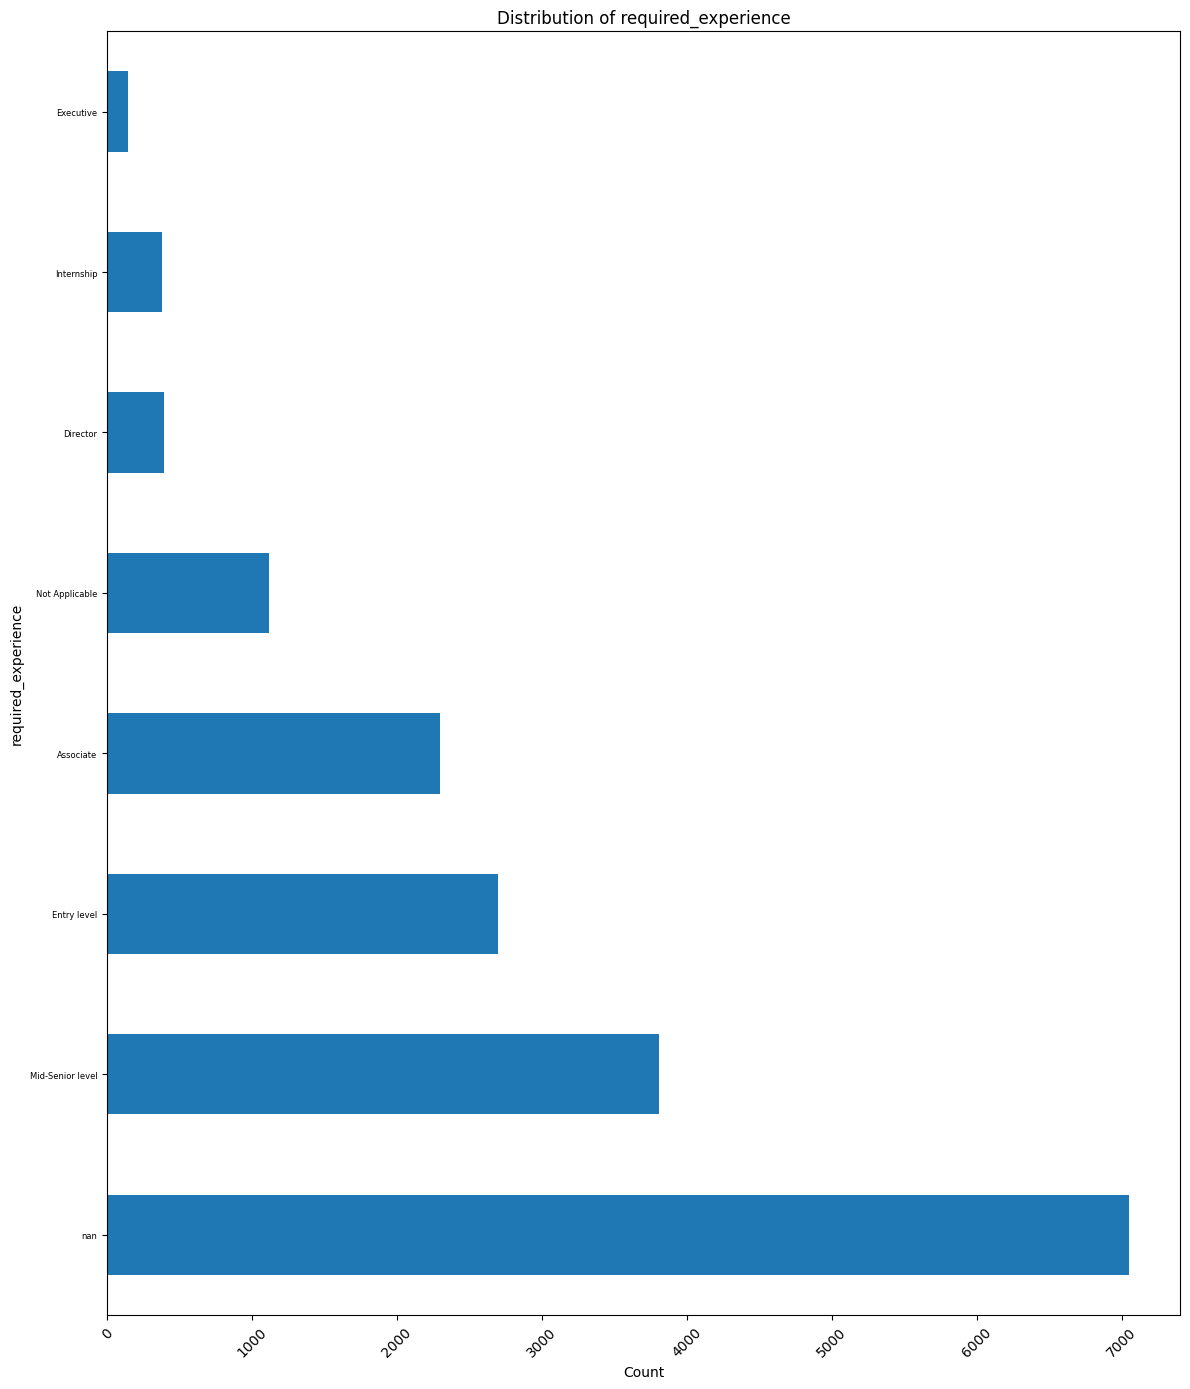

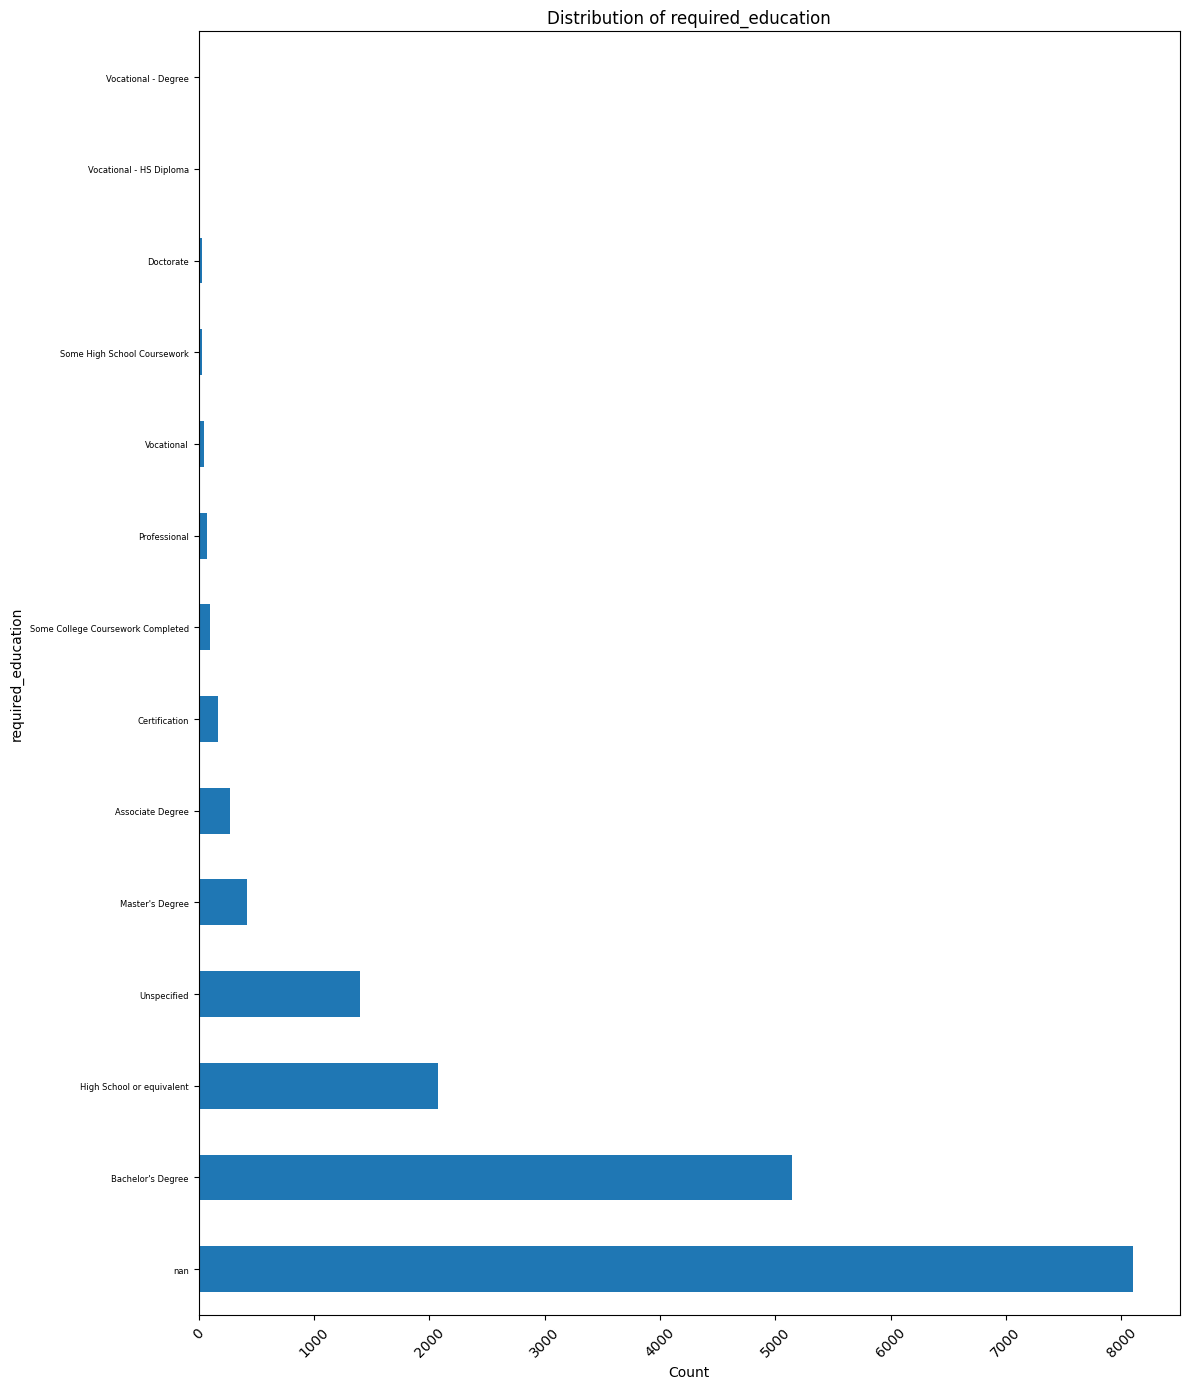

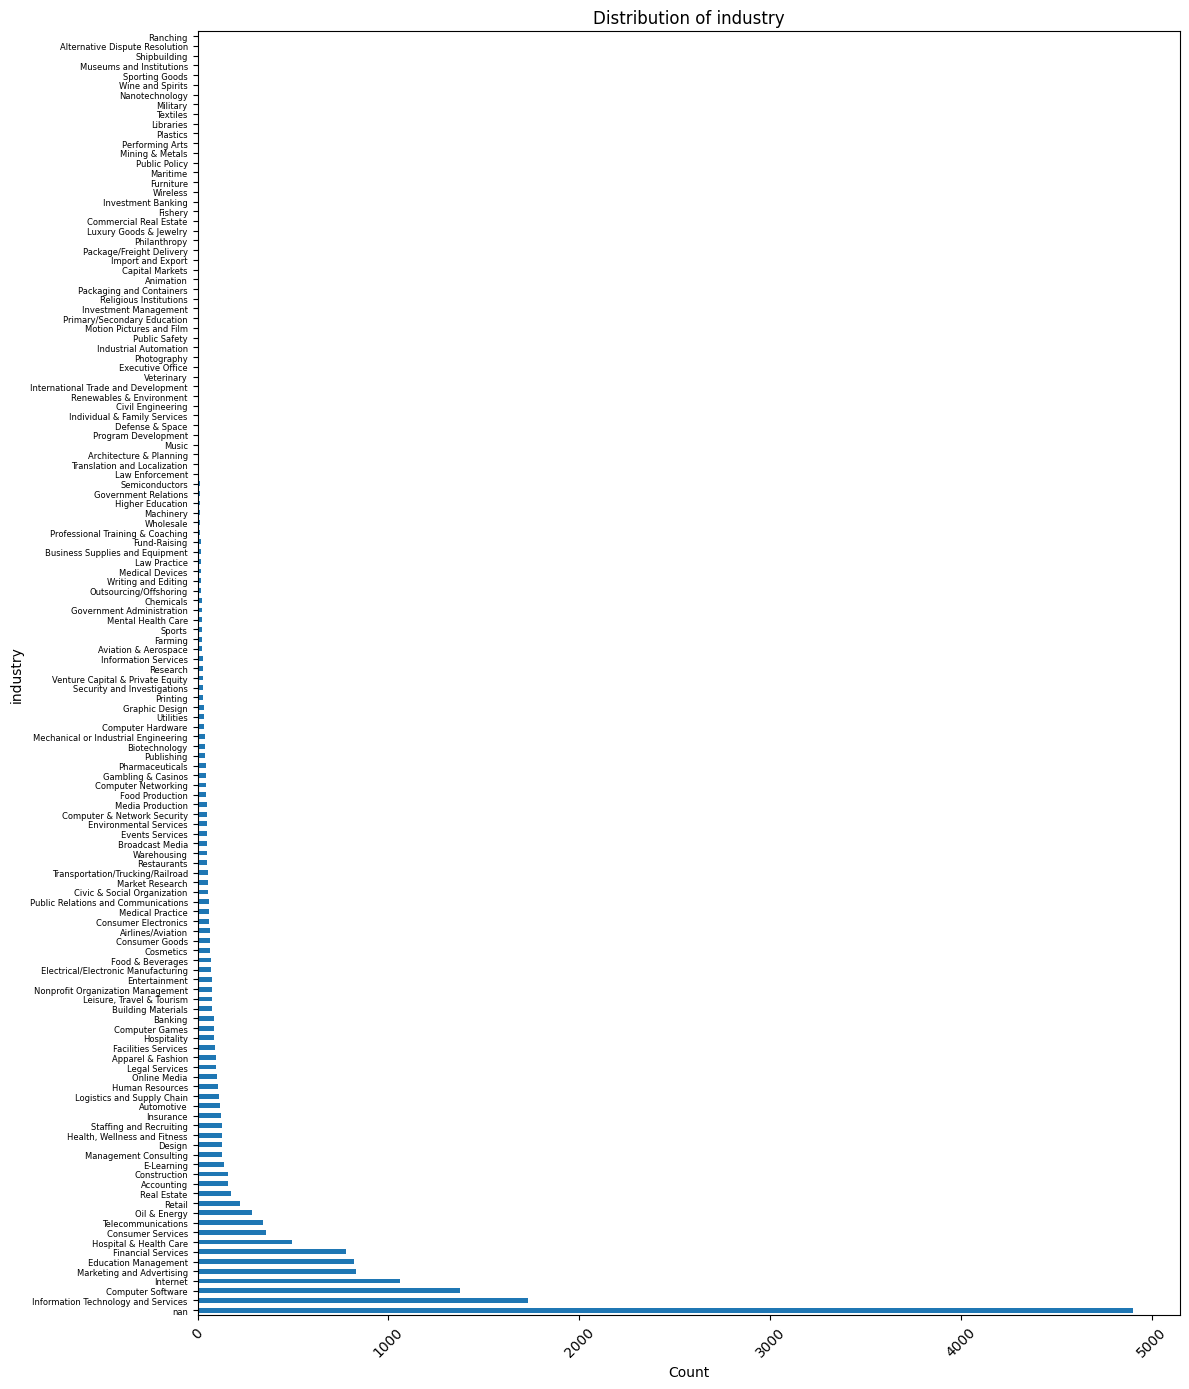

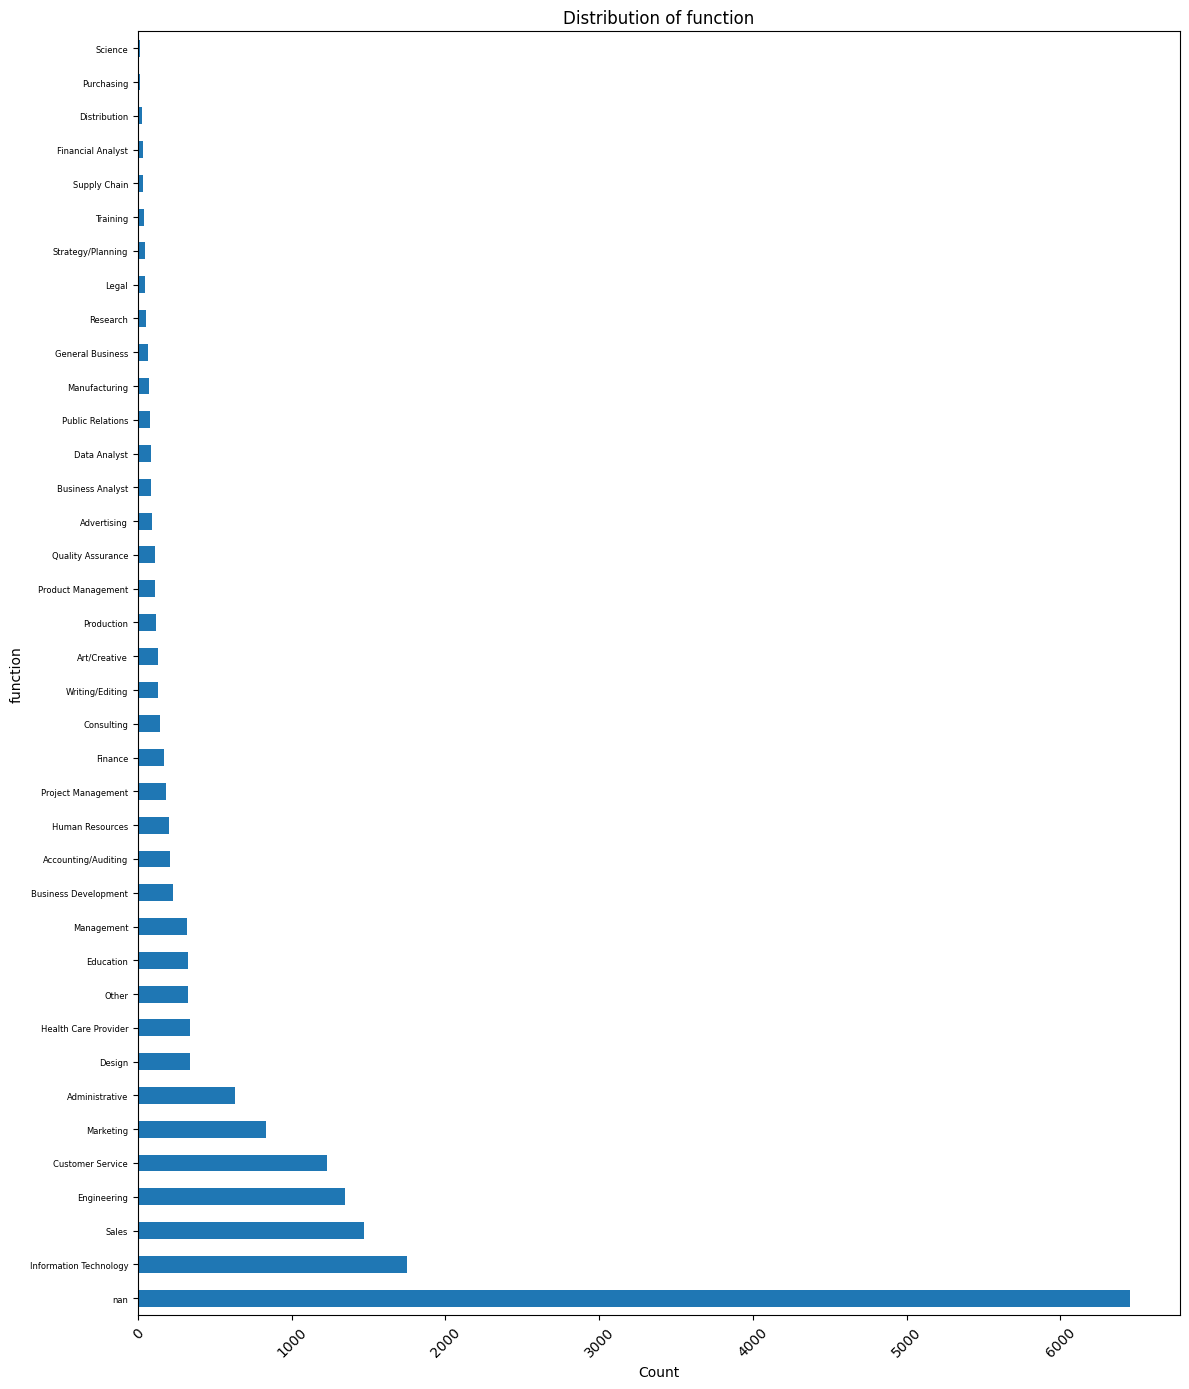

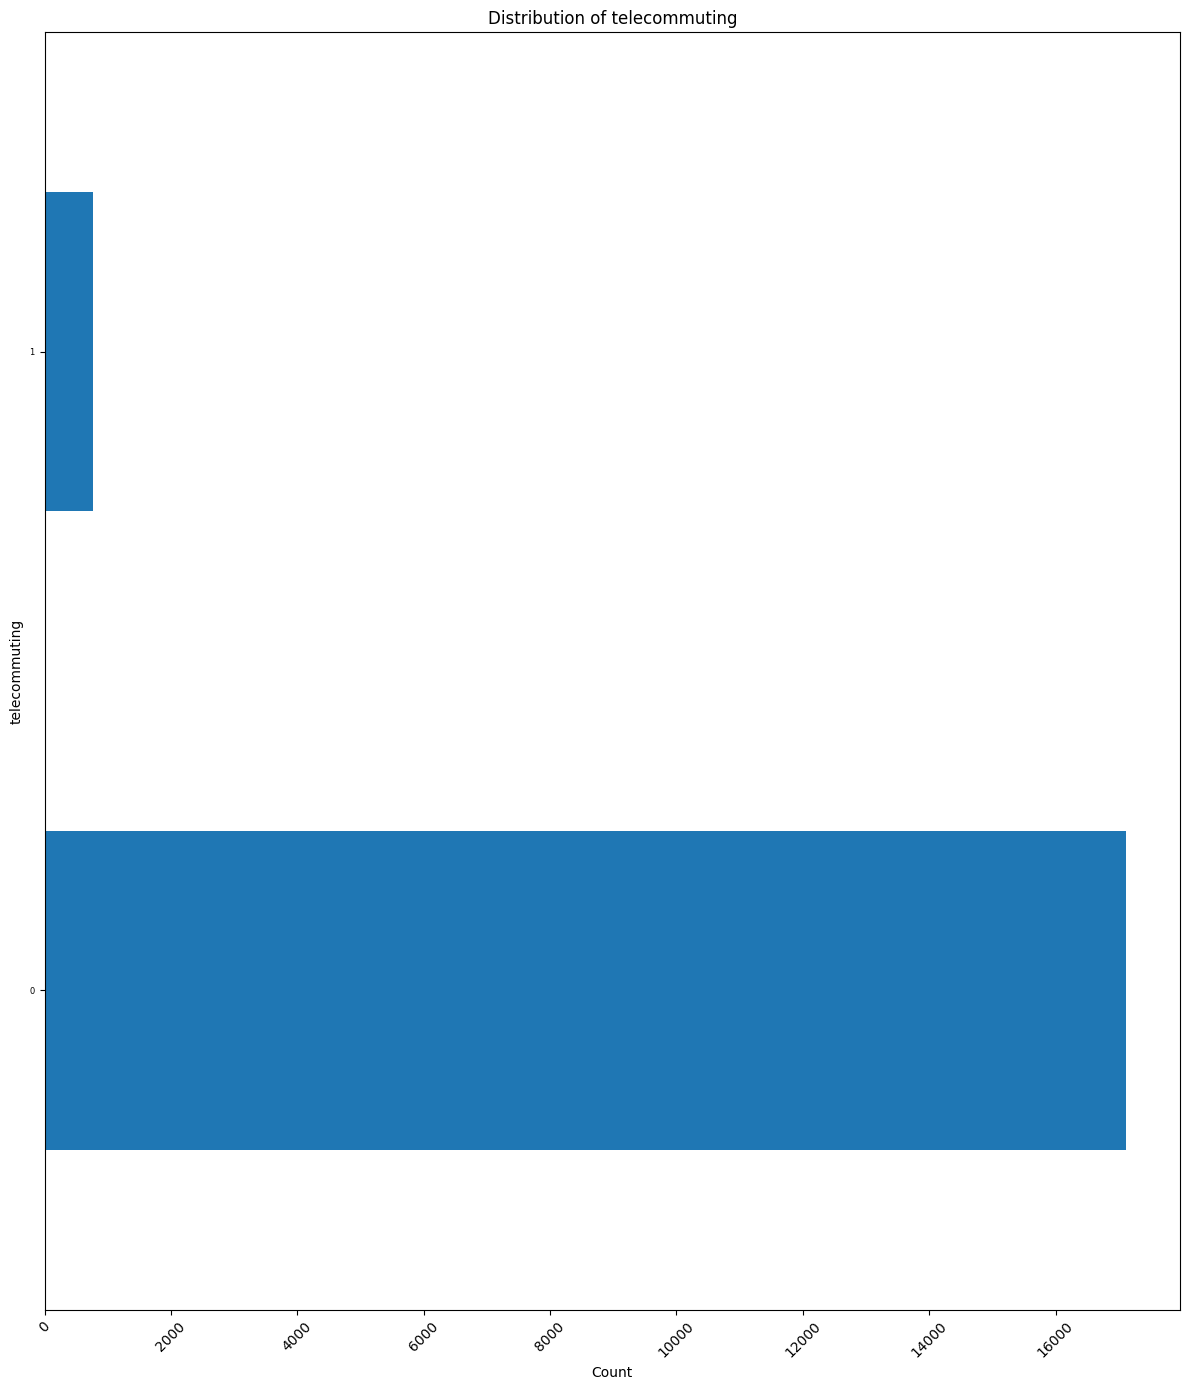

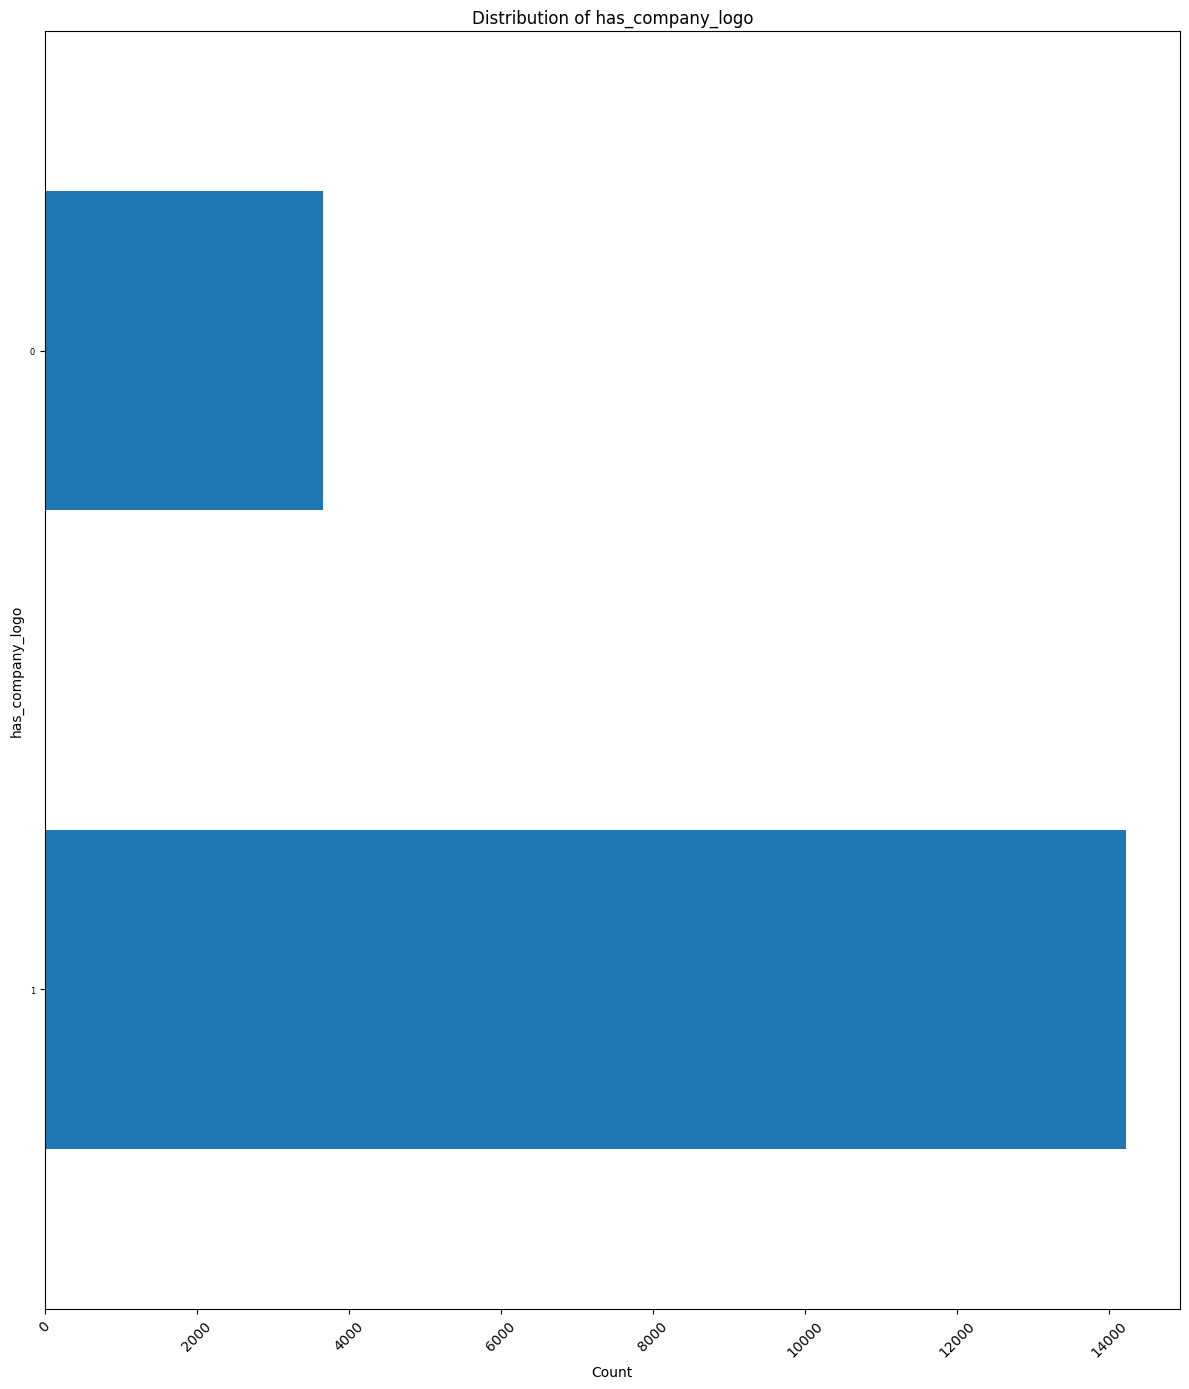

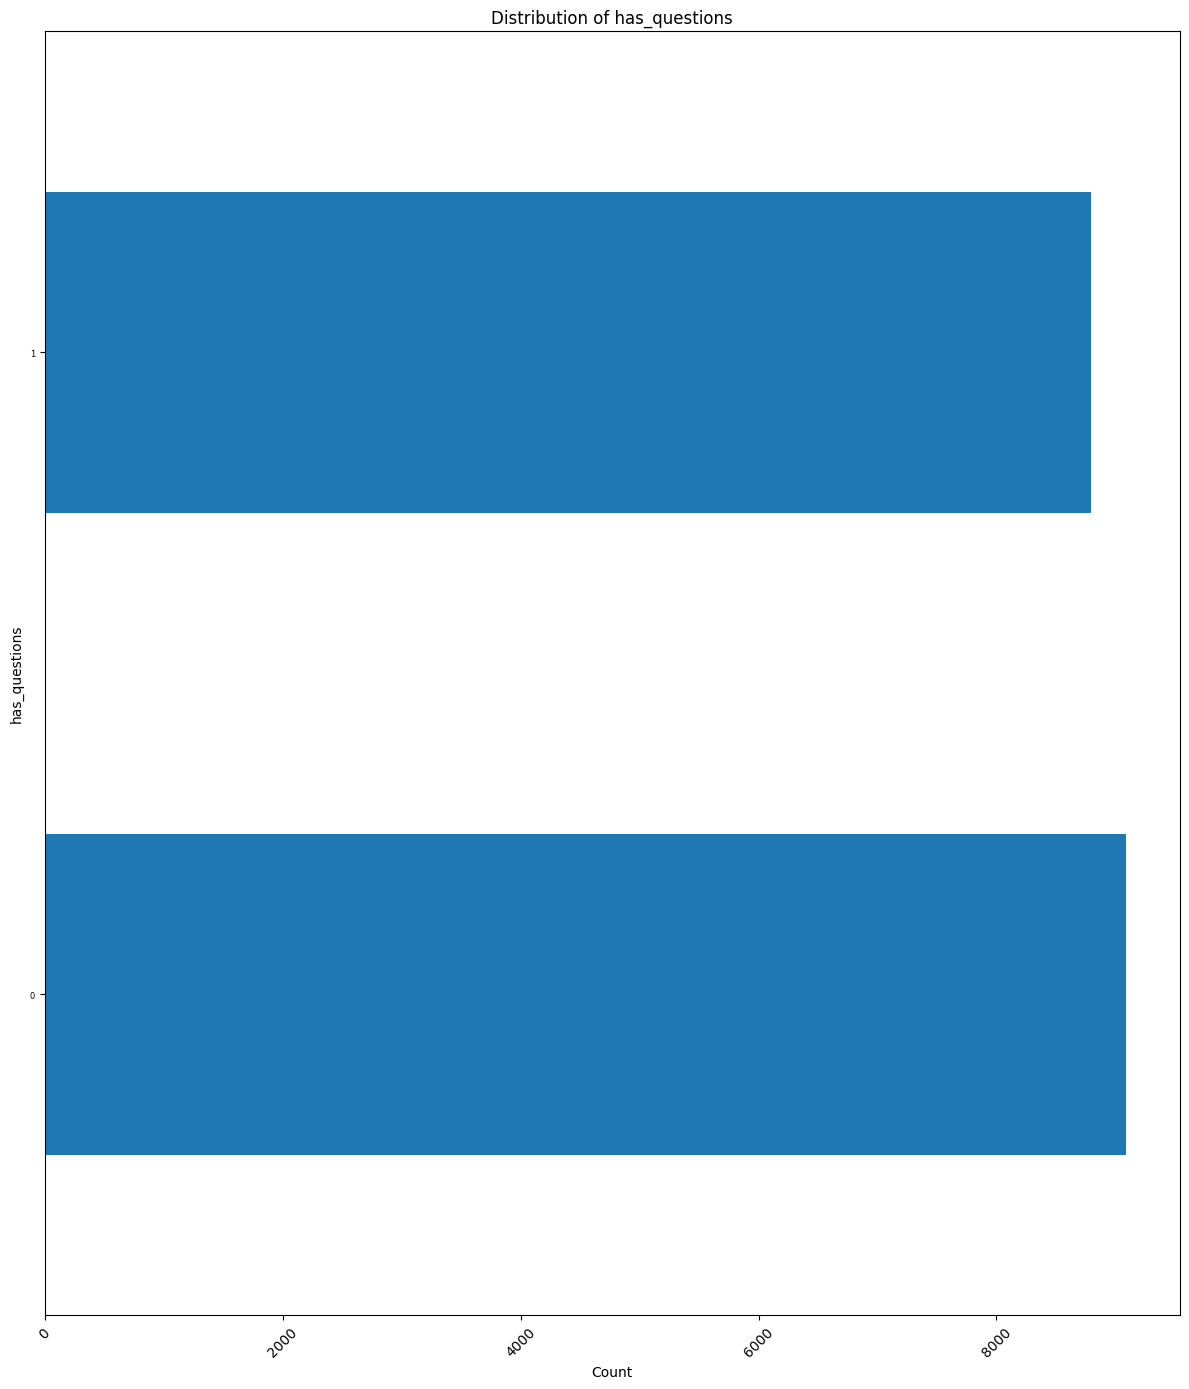

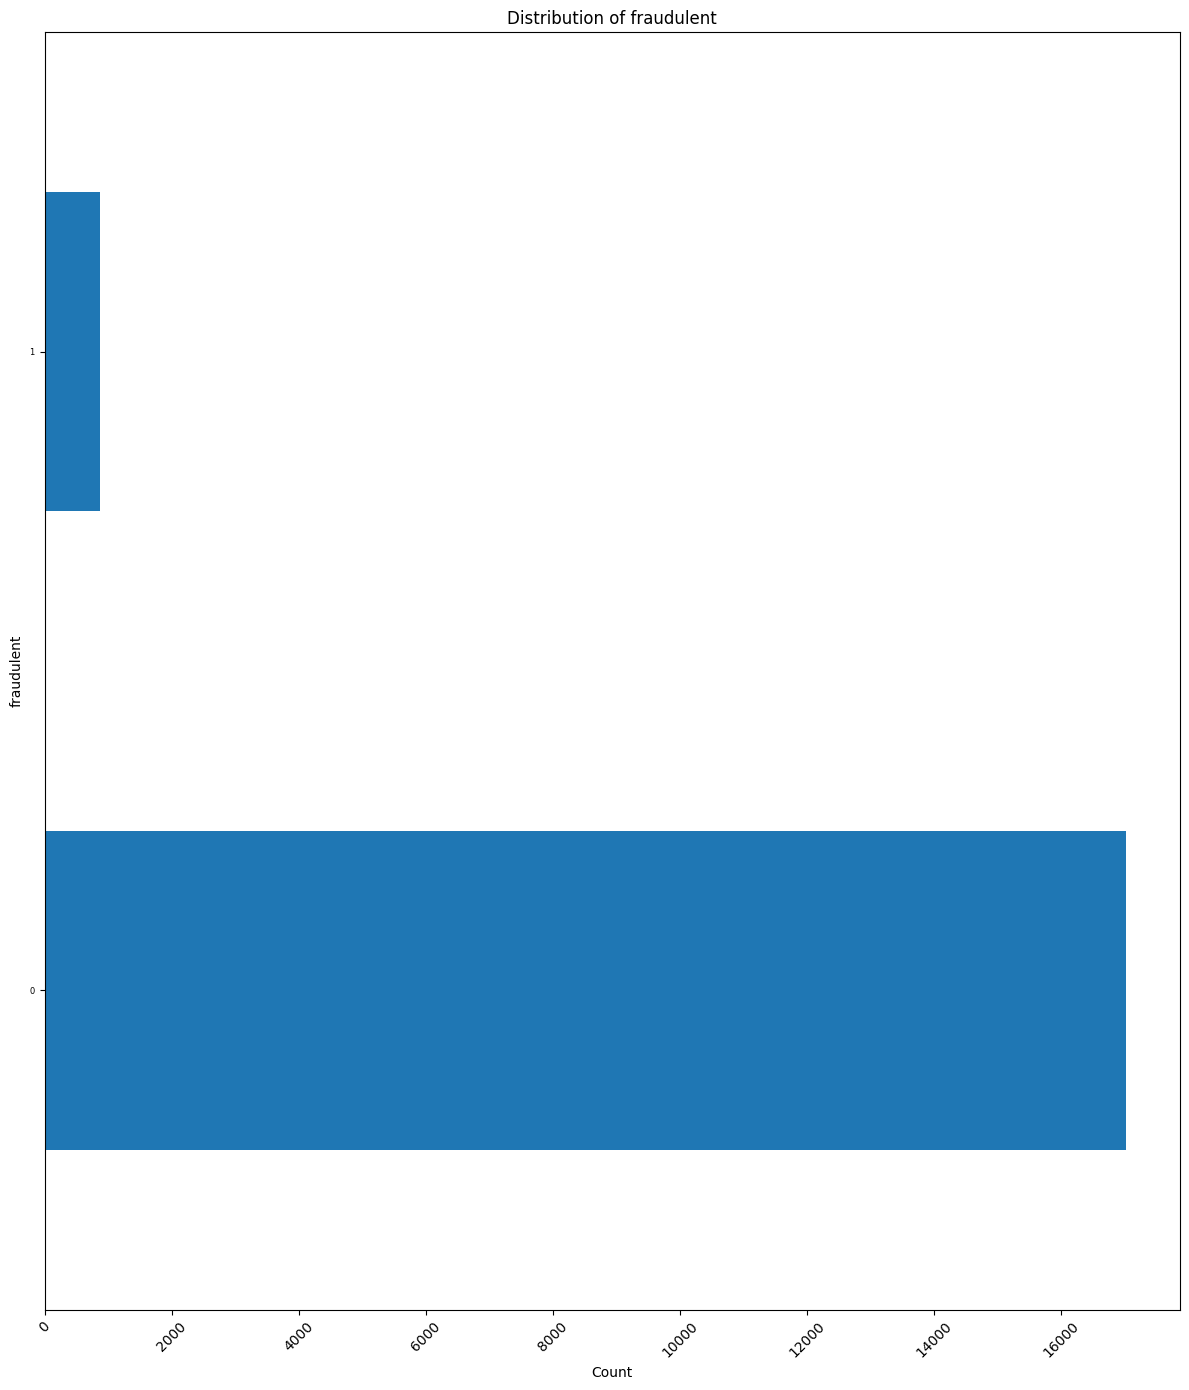

In [14]:
def plot_categorical_distributions(df: pd.DataFrame, columns: list):
    """
    Plot bar charts for categorical columns to show value distributions.

    Args:
        df (pd.DataFrame): The dataset.
        columns (list): List of categorical & binary column names.
    """
    for col in columns:
        try:
            plt.figure(figsize=(12, 14))
            df[col].value_counts(dropna=False).plot(kind='barh')
            plt.title(f'Distribution of {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.xticks(rotation=45)
            plt.yticks(fontsize=6)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            logging.error(f"Failed to plot distribution for {col}: {e}")

# Select categorical and binary columns to visualize
categorical_columns = [
    'employment_type', 'required_experience', 'required_education',
    'industry', 'function', 'telecommuting', 'has_company_logo',
    'has_questions', 'fraudulent'
]

# Plot value distributions
plot_categorical_distributions(df, categorical_columns)

### Results:
After visualizing our data, we understand that our dataset has class imbalance because we have many more real jobs than fraudulent jobs. We will have to keep this in mind as we build our data science model.

Target Variable: fraudulent

Imbalanced classes:

0 (Real jobs) dominate the dataset.

1 (Fake jobs) are a minority.

We'll need to address this imbalance during modeling (e.g., SMOTE, stratified sampling).

### Purpose:
This function is designed to visualize the correlation relationships between selected numerical columns in the dataset. It computes the pairwise correlation matrix and plots it as a heatmap, where the strength and direction of the relationships are represented by color intensity. This helps in identifying strong positive or negative correlations between variables, which can inform feature selection, detect multicollinearity, or guide further analysis.

Correlation is a measure that shows the relationship between two variables. It ranges from -1 to +1:

Positive (+1) --> Strong positive correlation - as one goes up, the other also goes up.

Negative (-1) --> Strong negative correlation - as one goes up, the other goes down.

 None (0) --> No correlation - they don't move together in any predictable way.

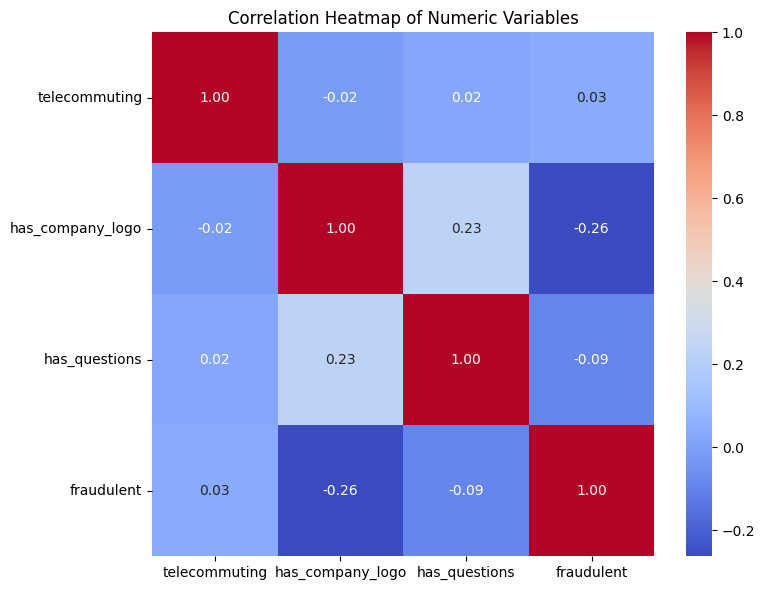

In [15]:
import seaborn as sns

def plot_correlation_heatmap(df: pd.DataFrame, numeric_cols: list):
    """
    Plot a heatmap showing correlation between numerical columns.

    Args:
        Pandas Dataframe (pd.DataFrame): The dataset.
        numeric_cols (list): List of numerical column names.
    """
    try:
        corr_matrix = df[numeric_cols].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
        plt.title('Correlation Heatmap of Numeric Variables')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        logging.error(f"Error plotting correlation heatmap: {e}")
        raise

# Define numeric columns
numeric_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

# Plot correlation heatmap
plot_correlation_heatmap(df, numeric_columns)


### Results:
1. Field: has_company_logo

    - Correlation with fraudulent: negative

    - Meaning: If a job has a company logo (has_company_logo = 1), it's less likely to be fake

    - So: Fake jobs often don’t have logos → makes sense.

2. Field: has_questions

    - Correlation with fraudulent: positive

    - Meaning: If has_questions = 1 (i.e., the job does have screening questions), it's more likely to be fake

    - But this seems counterintuitive? You'd think real jobs use questions more?


3. Explanation?

The opposite is more likely true in most real-world cases:

Real jobs do include screening questions. Fake jobs tend to skip them, because they want to look easy/appealing.

So, if has_questions has a positive correlation with fraudulent, it might be due to:

    3.1 - Noise or imbalance in the data.

    3.2 - Possible feature encoding error.

    3.3 - Or the correlation is very weak and not meaningful in practice.

Conclusion:

A positive correlation with fraudulent means that as the other variable increases (e.g., has_questions = 1), the likelihood of being fake (fraudulent = 1) also increases.

But correlation only shows association, not causation.



### Step 2: Structuring

Structuring data transforms features to uniform formats, units, and scales.


### Purpose:
Format text fields in a uniform format

In [16]:
import re

def format_text(text: str) -> str:
  """
  Clean the input text converting to lowercase and removing whitespaces. We will leave non-ascii characters as it could be an indicator of a fraudulent job.
  Args:
      text (str): The input text to be cleaned.

  Returns:
      str: The cleaned text
  """
  if not isinstance(text, str):
      raise ValueError("Input must be a string.")
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  return text

  df['description'] = df['description'].apply(format_text)
  df['requirements'] = df['requirements'].apply(format_text)
  df['title'] = df['title'].apply(format_text)

### Results:
Now the text fields we care about for our model are formatted consistently. Due to the nature of our dataset we did not have to do too much structuring to it.

### Step 3: Cleaning

Cleaning data removes or replaces missing and outlier data.

### Purpose:

We saw earlier in a table that we have certain coumns with missing data ordered by percentage, now we either want to drop/filter those columns out of our dataset also because they have poor real-world usability for our Data Science Model.

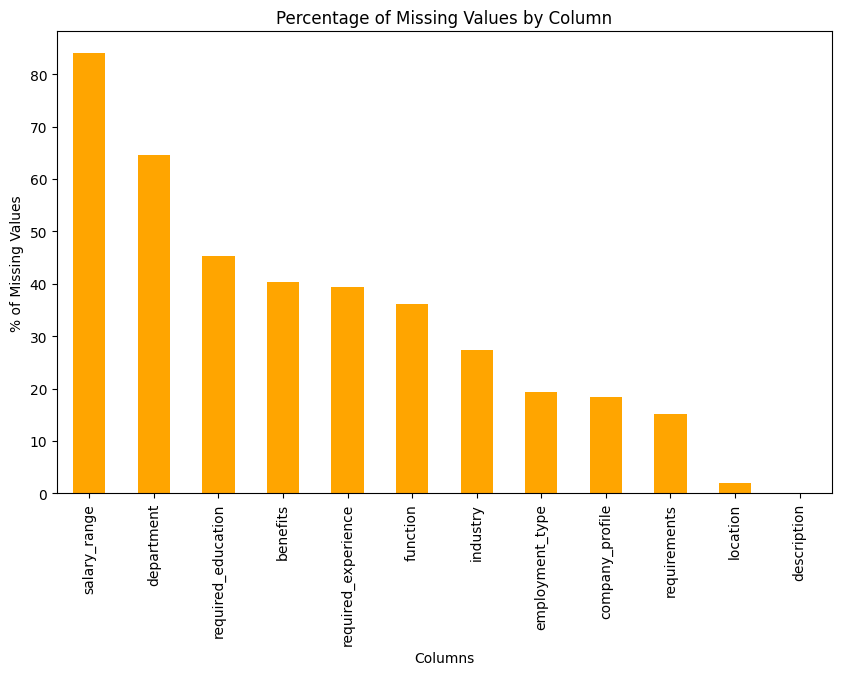

In [28]:
# Count and display percentage of missing values:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar', color='orange')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('% of Missing Values')
plt.xlabel('Columns')
plt.show()


### Results:
We've visualized some of the fields we intend to filter in the coming steps.

### Purpose:

We want to filter the dataframe to only have our feature and target columns since some of the other fields have too mnay nulls or are not usable for our goals and have poor real-world application.

Features:

  - Text: title, description, requirements, company_profile

  - Structured: employment_type (Categorical), telecommuting (Boolean)

Target:
  - fraudulent

In [26]:
def filter_dataframe(df: pd.DataFrame, required_columns: List[str]) -> pd.DataFrame:
    """
    Filters the input DataFrame to retain only the specified columns, in the given order.

    Parameters
    ----------
    df: pd.DataFrame - The input DataFrame to process.

    required_columns: List[str]
        A list of columns that must be present in the DataFrame. Only these columns will be retained, in this order.

    Returns
    -------
    pd.DataFrame: A new DataFrame containing only the specified columns, in the specified order.

    Raises
    ------
    ValueError: If any of the required columns are missing in the input DataFrame.
    """
    missing = set(required_columns) - set(df.columns)
    if missing:
        raise ValueError(f"Missing required column(s): {', '.join(missing)}")

    return df[required_columns]

required_columns = [
    "job_id",
    "title",
    "description",
    "requirements",
    "company_profile",
    "employment_type",
    "telecommuting",
    "fraudulent"
]

filtered_df = filter_dataframe(df, required_columns)

In [27]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_id           17880 non-null  int64 
 1   title            17880 non-null  object
 2   description      17879 non-null  object
 3   requirements     15184 non-null  object
 4   company_profile  14572 non-null  object
 5   employment_type  14409 non-null  object
 6   telecommuting    17880 non-null  int64 
 7   fraudulent       17880 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.1+ MB


### Results:

Now we have only our feature and target columns along with the "job_id" field to easily identify a given row.

### Purpose:
This function is responsible for cleaning the dataset by addressing missing or incomplete data in key text and categorical fields. Specifically, it performs two main operations:

1. Row Removal: It drops rows where all of the major text fields (title, description, requirements, company_profile) are missing, as such records provide no useful information.

2. Value Imputation: It fills missing or blank values in the employment_type column with the placeholder value 'Unknown', ensuring consistent treatment of missing employment data.

This cleaning step improves data quality by removing irrelevant records and standardizing missing values, making the dataset more reliable for analysis and modeling.

In [ ]:
def clean_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans the dataset by applying the following transformations:
    1. Drops rows where all four specified text columns are missing (NaN).
    2. Fills missing and empty string values in the 'employment_type' column with 'Unknown'.

    Parameters
    ----------
    df: pd.DataFrame - The input DataFrame to clean.

    Returns
    -------
    pd.DataFrame - A cleaned DataFrame with the specified transformations applied.
    """
    text_columns = ['title', 'description', 'requirements', 'company_profile']
    rows_before = len(df)

    # Drop rows where all text columns are missing:
    df_cleaned = df.dropna(subset=text_columns, how='all')
    rows_after = len(df_cleaned)
    dropped = rows_before - rows_after

    # Fill missing or blank 'employment_type' with 'Unknown':
    df_cleaned['employment_type'] = df_cleaned['employment_type'].apply(lambda x: 'Unknown' if pd.isna(x) or str(x).strip() == '' else x)

    print(f"[INFO] Dropped {dropped} rows with all text fields missing.")
    print(f"[INFO] Filled 'employment_type' blanks and NaNs with 'Unknown'.")

    return df_cleaned

# Supply the filtered dataframe from the previous step:
cleaned_df = clean_dataset(filtered_df)

### Results:
We now have our cleaned dataframe and can continue with the next steps.

### Step 4: Enriching

Enriching data derives new features from existing features and appends new data from external sources.

test

In [ ]:
import textstat

df_cleaned[f'description_wordcount'] = df_cleaned['description'].astype(str).apply(lambda x: len(x.split()))
df_cleaned[f'description_readability'] = df_cleaned['description'].astype(str).apply(textstat.flesch_reading_ease).fillna(0).astype(float)
df_cleaned['description_complexity_score'] = df_cleaned['description'].astype(str).apply(lambda x: textstat.text_standard(x, float_output=True)).fillna(0).astype(float)

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         17880 non-null  object 
 1   company_profile               14572 non-null  object 
 2   description                   17879 non-null  object 
 3   requirements                  15184 non-null  object 
 4   telecommuting                 17880 non-null  int64  
 5   fraudulent                    17880 non-null  int64  
 6   employment_type_Contract      17880 non-null  float64
 7   employment_type_Full-time     17880 non-null  float64
 8   employment_type_Other         17880 non-null  float64
 9   employment_type_Part-time     17880 non-null  float64
 10  employment_type_Temporary     17880 non-null  float64
 11  employment_type_Unknown       17880 non-null  float64
 12  description_wordcount         17880 non-null  int64  
 13  d

### Step 5: Validating

Validating data verifies that the dataset is internally consistent and accurate.

### Step 6: Publishing

Publishing data makes the dataset available to other data scientists by storing data in a database, uploading data to the cloud, or distributing data files.

## Data Exploration

### Step 1: Understand the data

Find the size of the dataset (number of rows and columns), identify and categorize the features (categorical, numerical).

Looking at the shape of the dataset to find how many records and columns we have.

In [ ]:
# Show basic info about dataset
if df is not None:
    print("Shape of dataset:", df.shape)


Shape of dataset: (17880, 23)


From looking at the shape of the dataset, we have 17,880 rows and 18 columns.

We can identify and categorize the features using the info method of the dataset.

In [ ]:
print("\nData types and non-null counts:")
print(df.info())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   job_id                     17880 non-null  int64  
 1   title                      17880 non-null  object 
 2   location                   17534 non-null  object 
 3   department                 6333 non-null   object 
 4   salary_range               2868 non-null   object 
 5   company_profile            14572 non-null  object 
 6   description                17879 non-null  object 
 7   requirements               15184 non-null  object 
 8   benefits                   10668 non-null  object 
 9   telecommuting              17880 non-null  int64  
 10  has_company_logo           17880 non-null  int64  
 11  has_questions              17880 non-null  int64  
 12  required_experience        10830 non-null  object 
 13  required_educ

Looking at the dataset using the info method, we can see that we have 5 numerical and 13 catergorial features listed below.

Catergorical:
* title
* location
* department
* salary_range
* company_profile
* description
* requirements
* benefits
* employment_type
* required_experience
* required_education
* industry
* function

Numerical:
* job_id
* telecommuting
* has_company_logo
* has_questions
* fradulent

### Step 2: Identify relationships between features

Find the direction (positive, negative) and strength (strong, moderate, weak) of correlation between the features.

### Step 3: Describe the shape of data

Determine the shape of the distribution (symmetric, skewed).

### Step 4: Detect outliers and missing data

Find values that are much higher or lower than the rest of the data or values that strongly affect the shape of the data.

# ================= END OF TEMPLATE ============================

One Hot Encode Employment type.  Other object types are true/false or will be handled in Text processing.  TODO:  Should we just dropna instead of fillna?

Darshan: I think this should be done later on, because we are only keeping some columns (Feature and Target), and only of those columns we need to fill Nan, Blank, Empty values with 'Unknown', I think it's better to do that.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
print(f"employment na count: {df['employment_type'].isna().sum()}")
df.fillna({'employment_type': 'Unknown'}, inplace=True)
encoder.fit(df[['employment_type']])
encoded_employment = encoder.transform(df[['employment_type']])
encoded_employment_df = pd.DataFrame(encoded_employment, columns=encoder.get_feature_names_out(['employment_type']))
df = pd.concat([df, encoded_employment_df], axis=1)
df.drop('employment_type', axis=1, inplace=True)
df.info()



employment na count: 3471
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   job_id                     17880 non-null  int64  
 1   title                      17880 non-null  object 
 2   location                   17534 non-null  object 
 3   department                 6333 non-null   object 
 4   salary_range               2868 non-null   object 
 5   company_profile            14572 non-null  object 
 6   description                17879 non-null  object 
 7   requirements               15184 non-null  object 
 8   benefits                   10668 non-null  object 
 9   telecommuting              17880 non-null  int64  
 10  has_company_logo           17880 non-null  int64  
 11  has_questions              17880 non-null  int64  
 12  required_experience        10830 non-null  object 
 13  required_education  

Discovery, also called data exploration, is the process of becoming familiar with the data source.

First, we will import in commonly used libraries in data wrangling, as well as update some default pandas options to get a more complete visualization of the data.

With the libraries imported and Google Drive mounted, we'll now load the data and look at the features and shape of the dataset.

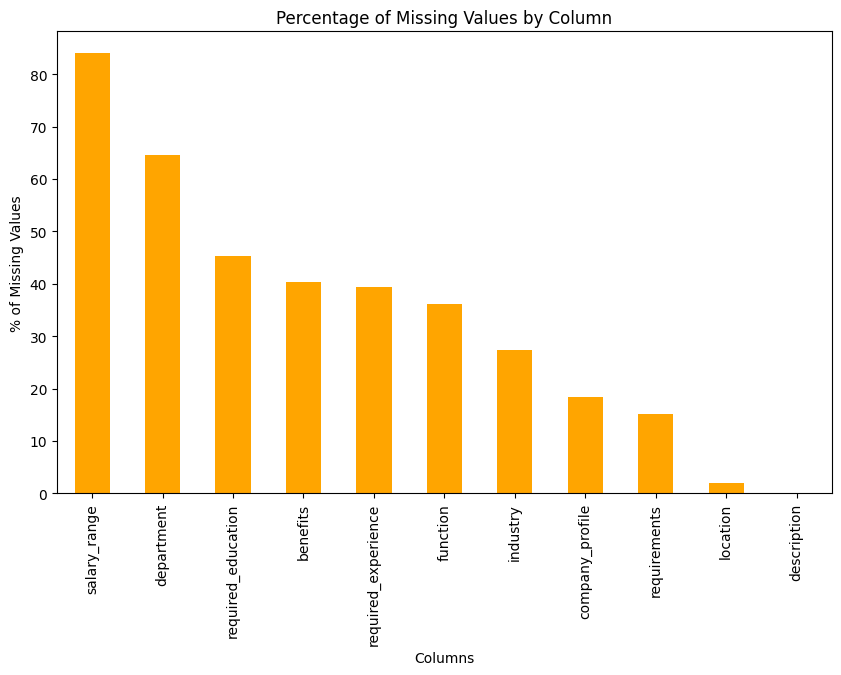

In [ ]:
# Count and display percentage of missing values:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar', color='orange')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('% of Missing Values')
plt.xlabel('Columns')
plt.show()
